
IMAGE 1: CR7 & Messi 1
Dimensions: (1422, 800, 3)
Type: uint8


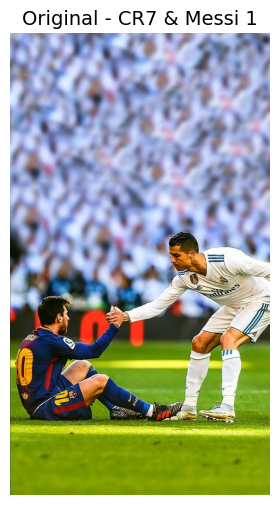

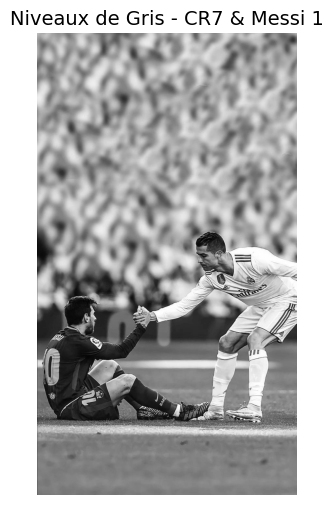

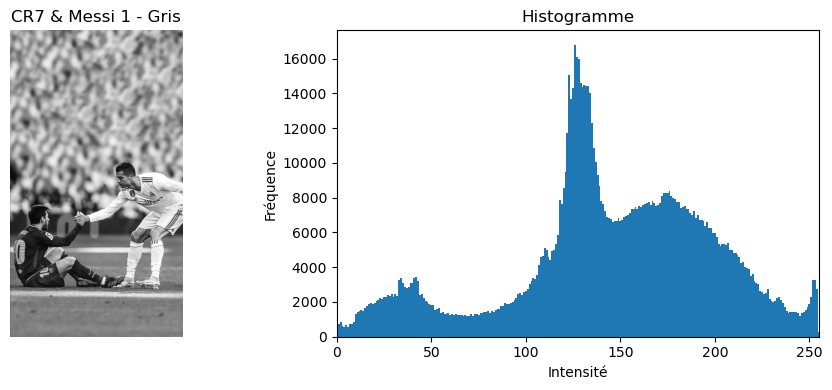


IMAGE 2: CR7 & Messi 2
Dimensions: (1594, 736, 3)
Type: uint8


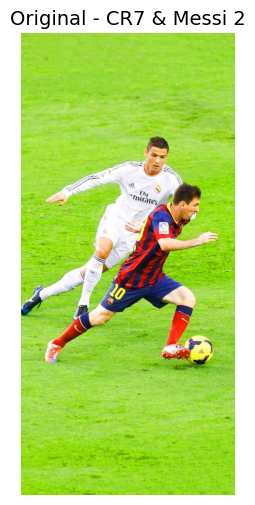

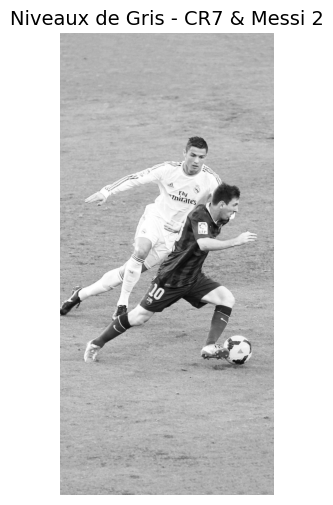

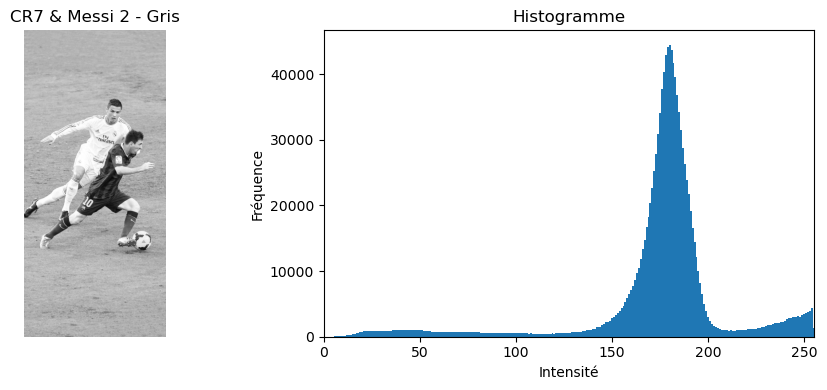


IMAGE 3: Logo OpenCV
Dimensions: (512, 512, 3)
Type: uint8


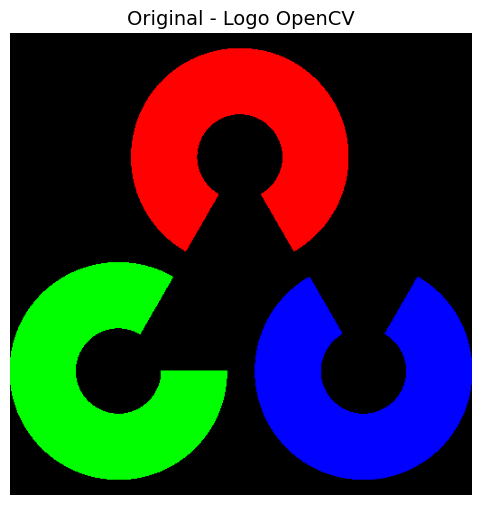

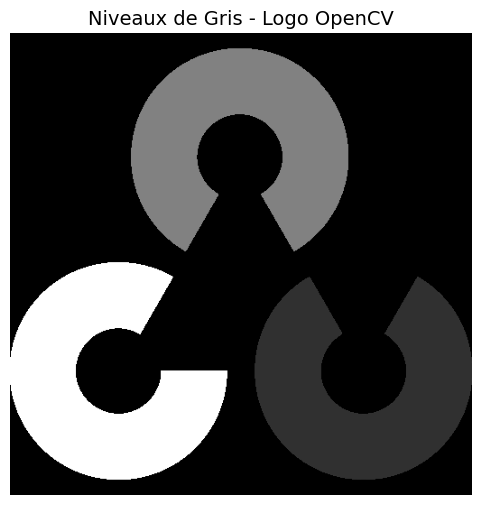

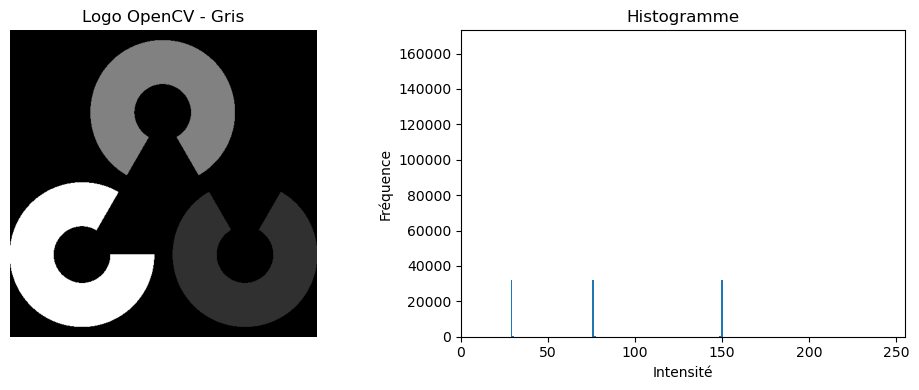

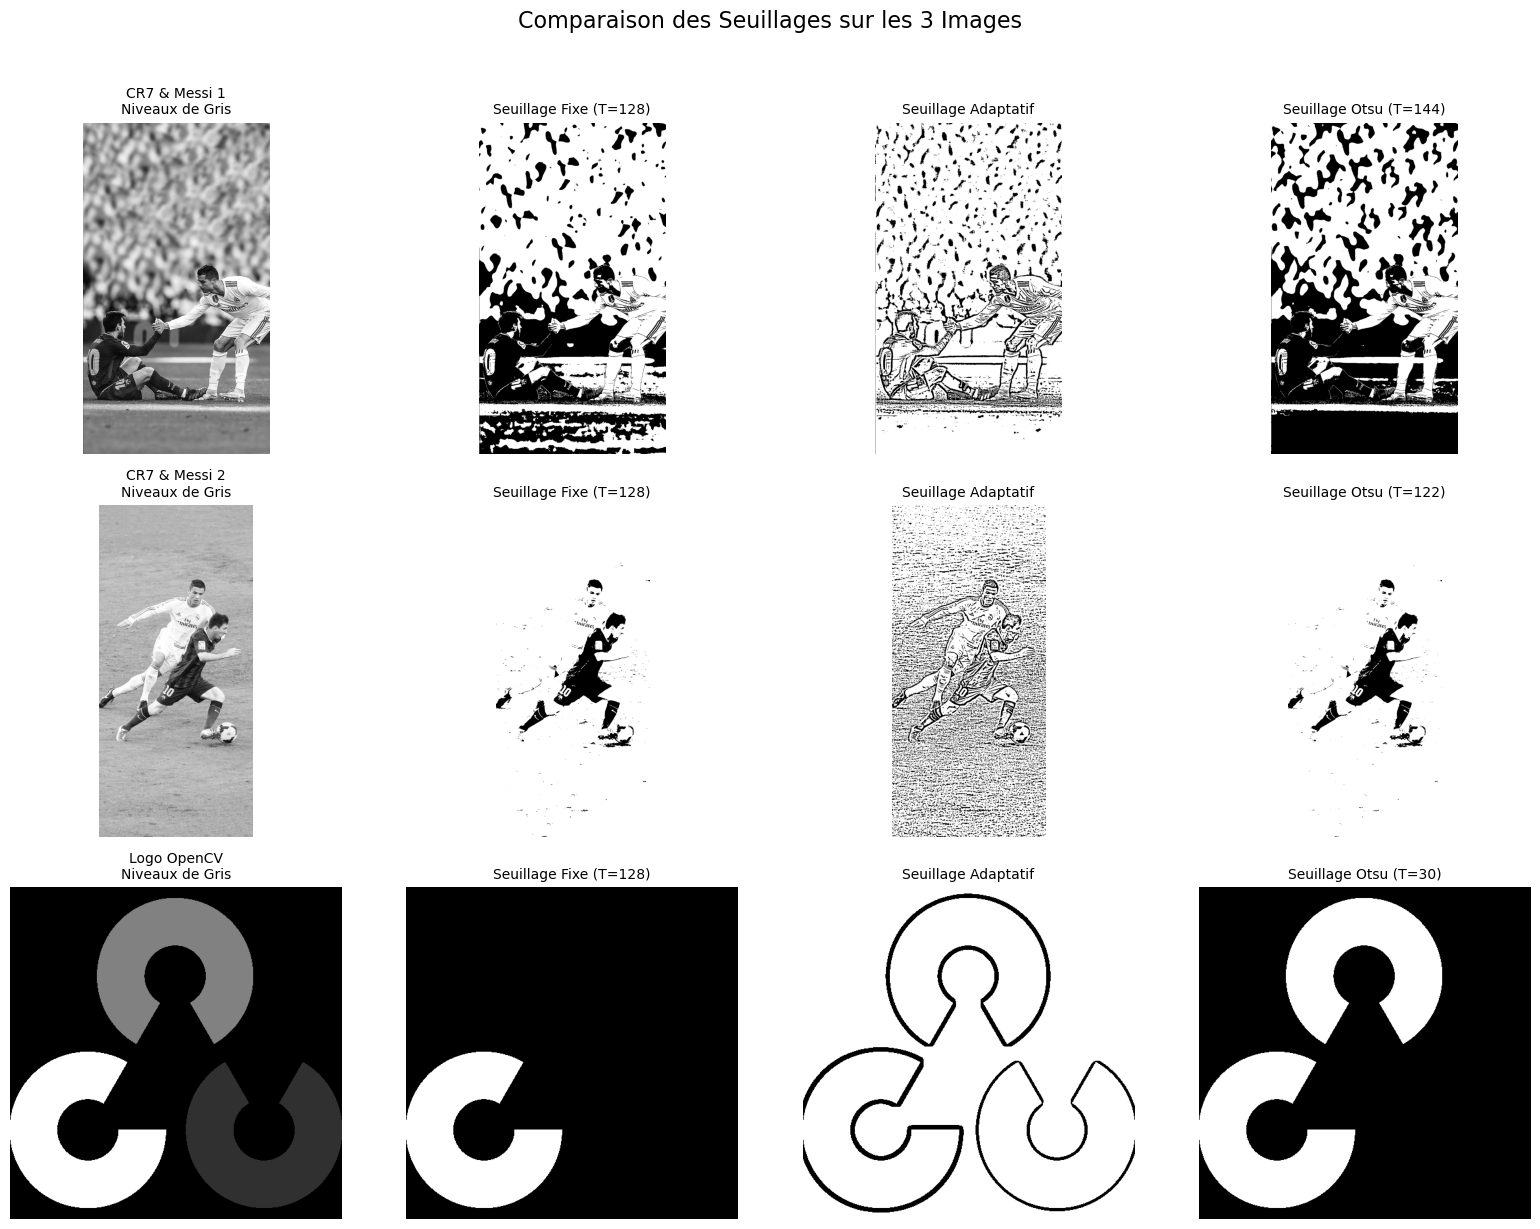

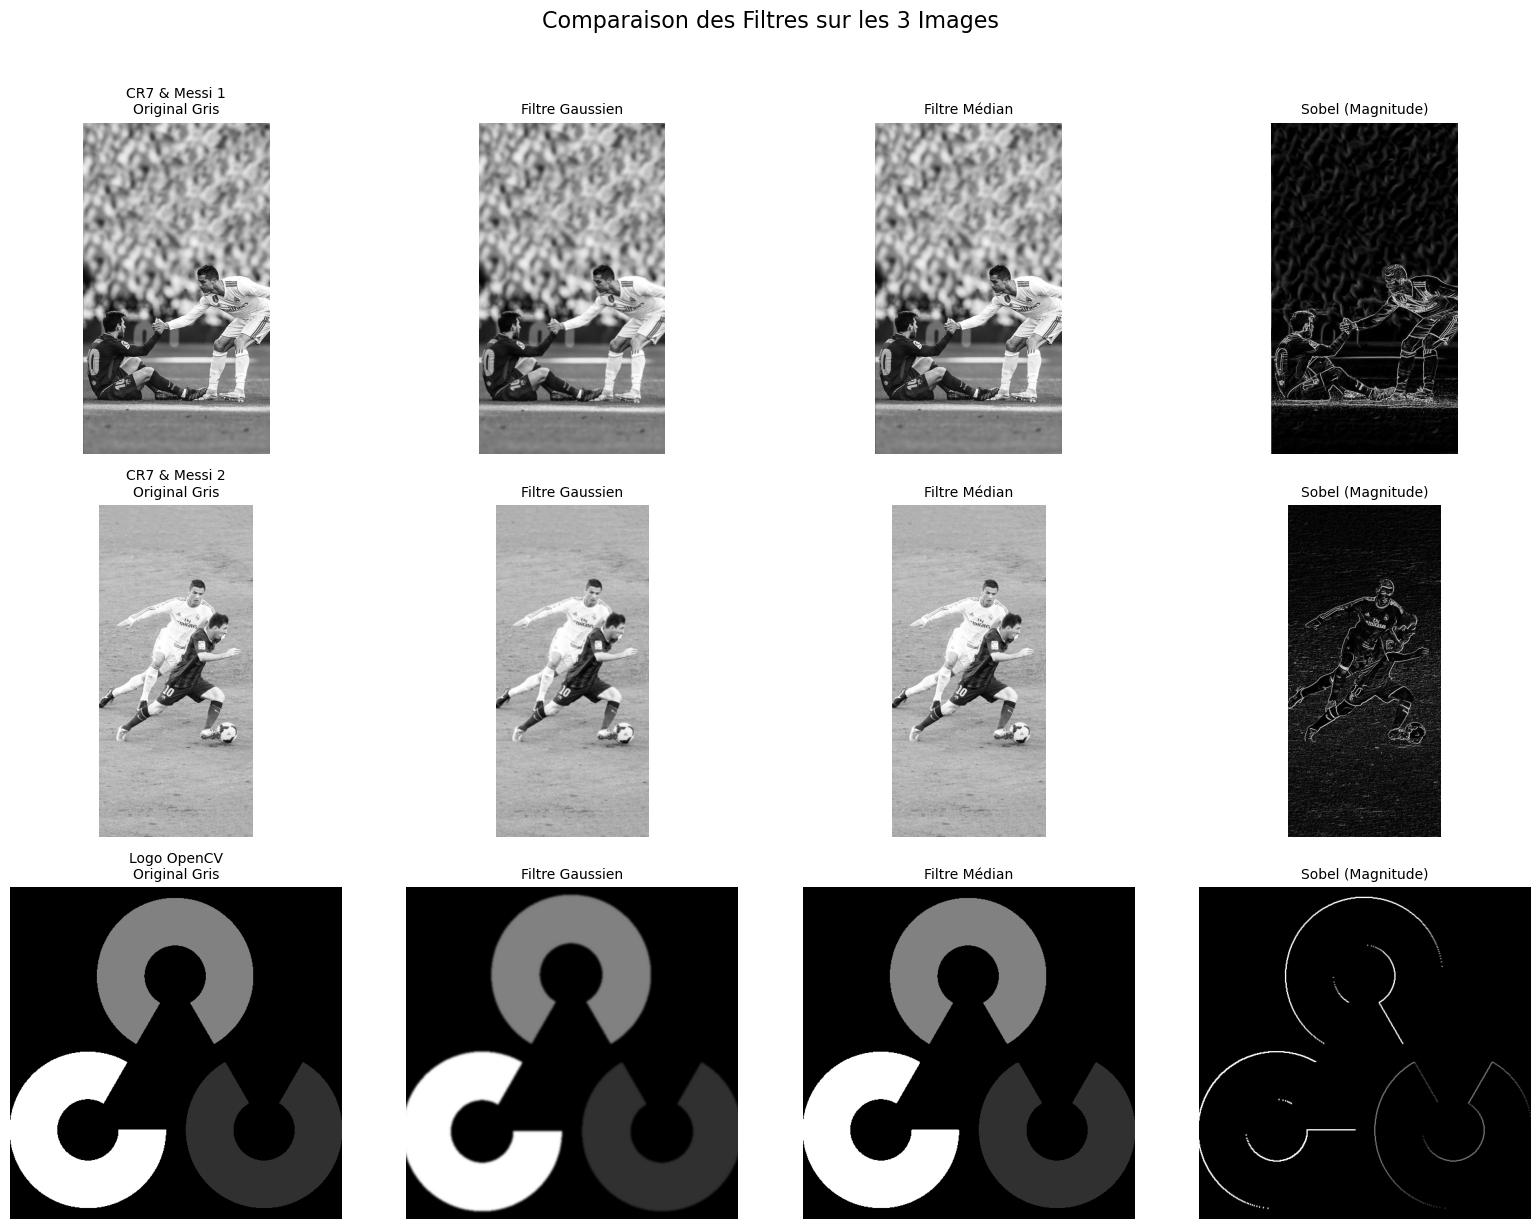

 Démonstration terminée!


In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

sys.path.append('../src')
from traitement_images import TraitementImages

# 1. Initialisation
processor = TraitementImages()

# 2. Chemins des images
image_paths = [
    Path('../images/cr7-messi.jpg'),
    Path('../images/cr7-messi2.jpg'),
    Path('../images/opencv_logo.webp')
]

image_names = ["CR7 & Messi 1", "CR7 & Messi 2", "Logo OpenCV"]

# 3. Fonction pour afficher une image
def show_image(image, title="", cmap=None):
    plt.figure(figsize=(8, 6))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(image)
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

# 4. Analyser chaque image
for i, (path, name) in enumerate(zip(image_paths, image_names), 1):
    print(f"\n{'='*60}")
    print(f"IMAGE {i}: {name}")
    print('='*60)
    
    # Charger l'image
    img_bgr = cv2.imread(str(path))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = processor.rgb_to_grayscale(img_bgr)
    
    print(f"Dimensions: {img_bgr.shape}")
    print(f"Type: {img_bgr.dtype}")
    
    # Afficher l'original
    show_image(img_rgb, f"Original - {name}")
    
    # Afficher en niveaux de gris
    show_image(img_gray, f"Niveaux de Gris - {name}", cmap='gray')
    
    # Histogramme
    hist = processor.calculer_histogramme(img_gray)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f'{name} - Gris')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(256), hist, width=1.0)
    plt.title('Histogramme')
    plt.xlabel('Intensité')
    plt.ylabel('Fréquence')
    plt.xlim([0, 255])
    plt.tight_layout()
    plt.show()

# 5. Comparaison des seuillages
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for idx, (path, name) in enumerate(zip(image_paths, image_names)):
    img_bgr = cv2.imread(str(path))
    img_gray = processor.rgb_to_grayscale(img_bgr)
    
    # Différents traitements
    binary_fixed = processor.seuillage_fixe(img_gray, 128)
    binary_adaptive = processor.seuillage_adaptatif(img_gray, block_size=15, C=5)
    binary_otsu, otsu_threshold = processor.seuillage_otsu(img_gray)
    img_gauss = processor.filtre_gaussien(img_gray)
    
    # Afficher dans la grille
    axes[idx, 0].imshow(img_gray, cmap='gray')
    axes[idx, 0].set_title(f'{name}\nNiveaux de Gris', fontsize=10)
    axes[idx, 0].axis('off')
    
    axes[idx, 1].imshow(binary_fixed, cmap='gray')
    axes[idx, 1].set_title('Seuillage Fixe (T=128)', fontsize=10)
    axes[idx, 1].axis('off')
    
    axes[idx, 2].imshow(binary_adaptive, cmap='gray')
    axes[idx, 2].set_title('Seuillage Adaptatif', fontsize=10)
    axes[idx, 2].axis('off')
    
    axes[idx, 3].imshow(binary_otsu, cmap='gray')
    axes[idx, 3].set_title(f'Seuillage Otsu (T={otsu_threshold})', fontsize=10)
    axes[idx, 3].axis('off')

plt.suptitle('Comparaison des Seuillages sur les 3 Images', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 6. Comparaison des filtres
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for idx, (path, name) in enumerate(zip(image_paths, image_names)):
    img_bgr = cv2.imread(str(path))
    img_gray = processor.rgb_to_grayscale(img_bgr)
    
    # Différents filtres
    img_gauss = processor.filtre_gaussien(img_gray, sigma=1.5)
    img_median = processor.filtre_median(img_gray, size=3)
    sobel_x, sobel_y, sobel_mag = processor.filtre_sobel(img_gray)
    
    # Conversions
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = processor.rgb_to_hsv(img_rgb)
    
    # Afficher
    axes[idx, 0].imshow(img_gray, cmap='gray')
    axes[idx, 0].set_title(f'{name}\nOriginal Gris', fontsize=10)
    axes[idx, 0].axis('off')
    
    axes[idx, 1].imshow(img_gauss, cmap='gray')
    axes[idx, 1].set_title('Filtre Gaussien', fontsize=10)
    axes[idx, 1].axis('off')
    
    axes[idx, 2].imshow(img_median, cmap='gray')
    axes[idx, 2].set_title('Filtre Médian', fontsize=10)
    axes[idx, 2].axis('off')
    
    axes[idx, 3].imshow(sobel_mag, cmap='gray')
    axes[idx, 3].set_title('Sobel (Magnitude)', fontsize=10)
    axes[idx, 3].axis('off')

plt.suptitle('Comparaison des Filtres sur les 3 Images', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print(" Démonstration terminée!")